In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Read the image
image = cv2.imread('/content/Tulips.jpg')

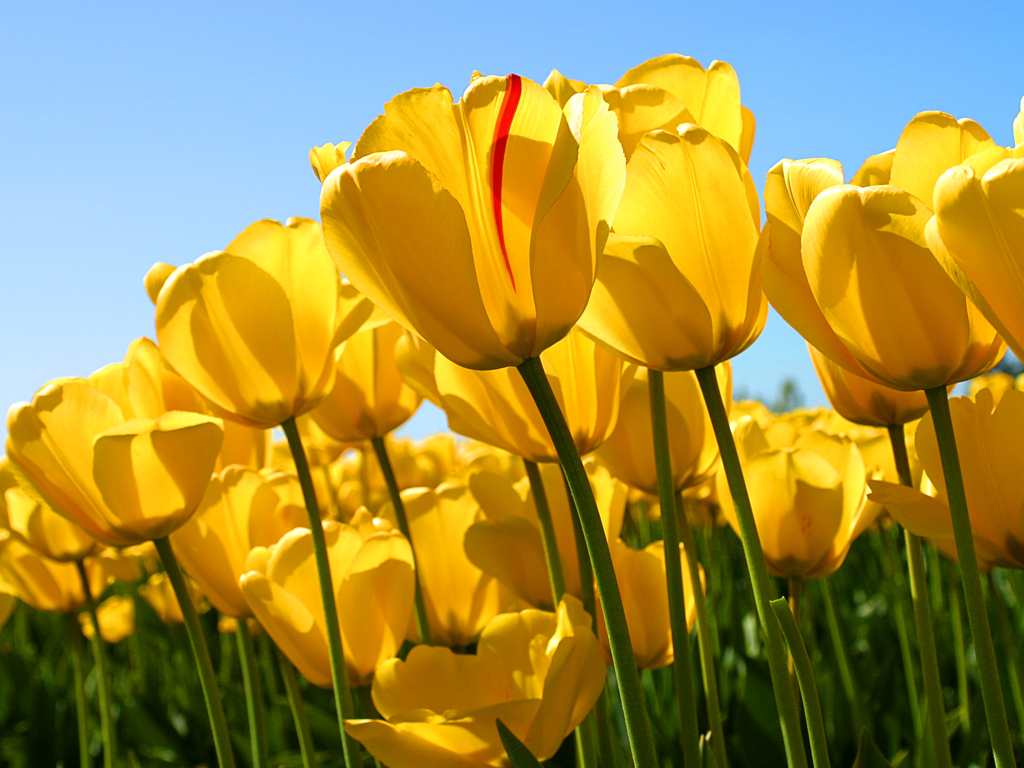

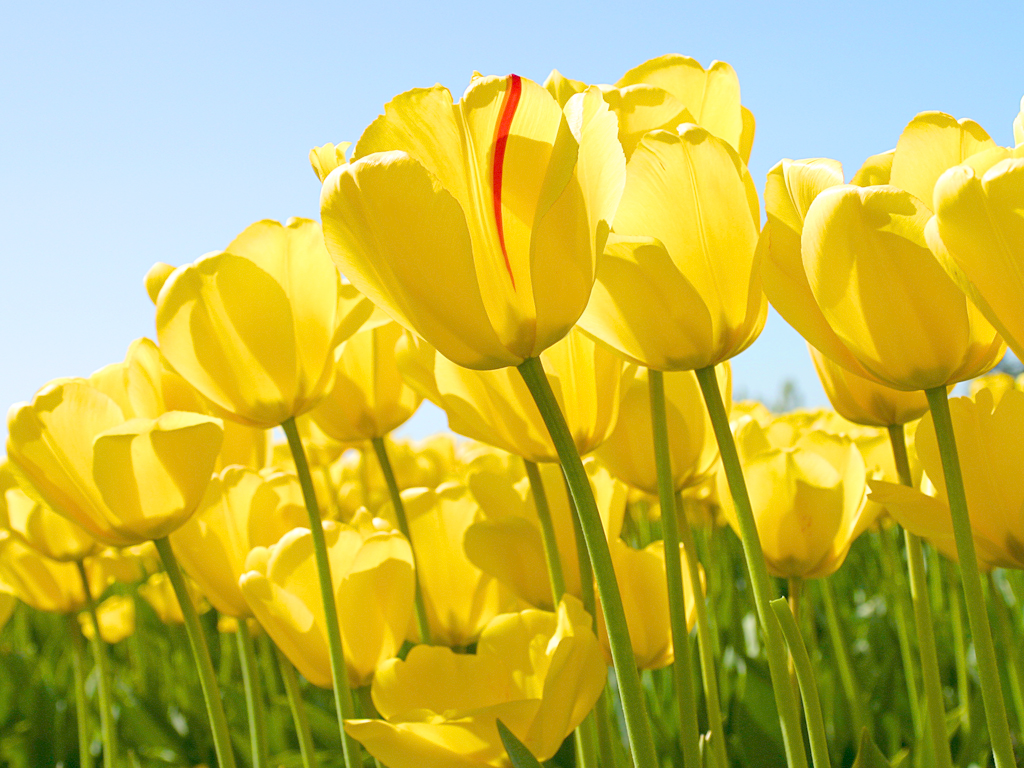

In [ ]:
# Define the gamma value (adjust this as needed)
gamma = 0.5

# Perform power-law transformation
gamma_corrected = np.uint8(np.power((image / 255.0), gamma) * 255.0)

# Display the original and transformed images
cv2_imshow(image)
cv2_imshow(gamma_corrected)

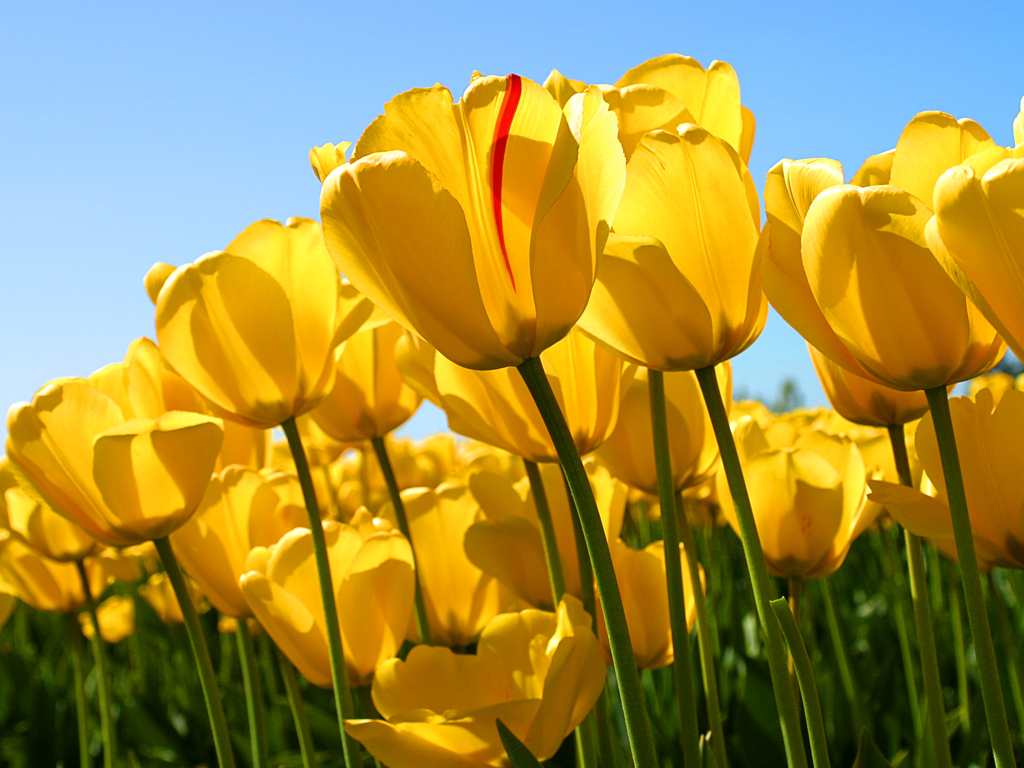

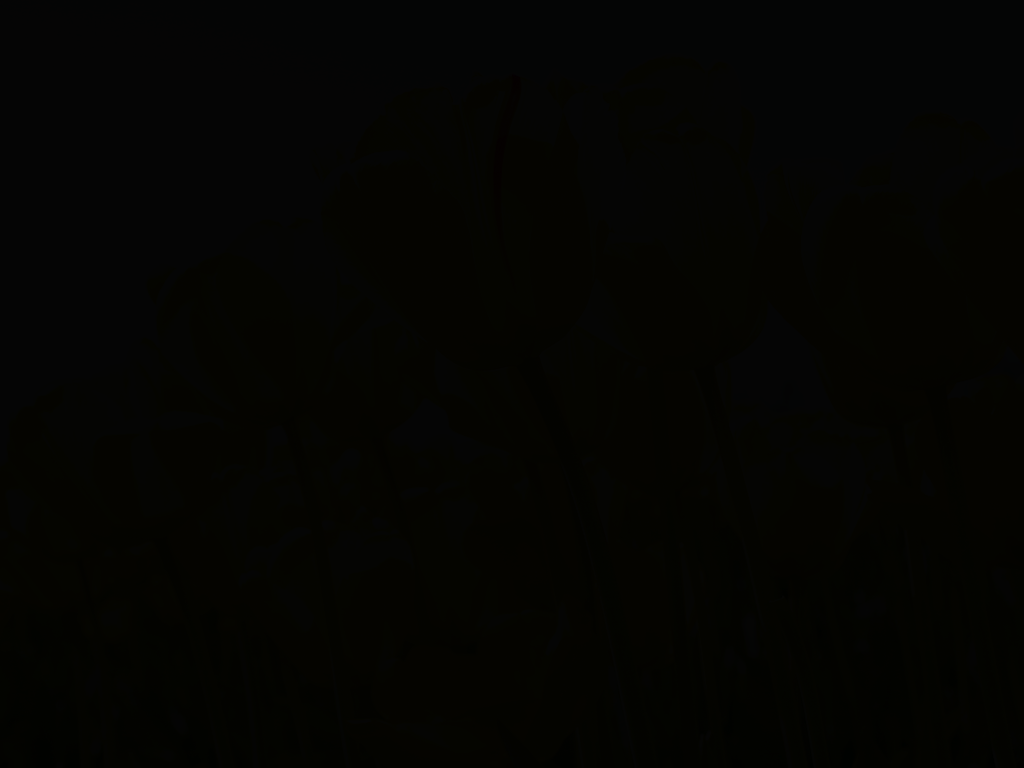

In [ ]:
# Perform log transformation
c = 1  # Constant for controlling the transformation
log_transformed = np.uint8(c * np.log1p(image))

# Display the original and transformed images
cv2_imshow(image)
cv2_imshow(log_transformed)

In [ ]:


# Define the piecewise linear function
def contrast_stretching(img):
    a, b = 28, 75  # Points (r1, s1) and (r2, s2)
    L = 256  # Number of gray levels

    # Apply piecewise linear function
    stretched = np.where((img >= a) & (img <= b), ((227 * img - 5040) / 47), img)

    return stretched

# Perform contrast stretching
stretched_image = contrast_stretching(image)

# Display the original and stretched images
cv2_imshow(image)
cv2_imshow(stretched_image)

In [ ]:

import cv2
import numpy as np
from google.colab import files
from IPython.display import Image, display

# Contrast Stretching Method 1
def contrast_stretching_method1(r):

    return   ((227 * r - 5040) / 47) if 28 <= r <= 75 else r

# Contrast Stretching Method 2
def contrast_stretching_method2(r):
    return 0 if r < 90 else (255 * r - 22950) / 48 if 90 <= r <= 138 else 255

# Upload your image to Colab
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Apply the specified rules element-wise to the image
    stretched_image1 = np.vectorize(contrast_stretching_method1)(image).astype(np.uint8)
    stretched_image2 = np.vectorize(contrast_stretching_method2)(image).astype(np.uint8)

    # Log Transformation
    log_image = (np.log1p(image) * 255 / np.log1p(255)).astype(np.uint8)

    # Power-law Transformation
    gamma = 0.5
    power_law_image = (255 * np.power(image / 255.0, gamma)).astype(np.uint8)

    # Display the original and processed images
    display(Image(filename=image_path, width=200, height=200), "Original Image")
    display(Image(data=cv2.imencode('.png', stretched_image1)[1], width=200, height=200), "Contrast Stretching Method 1")
    display(Image(data=cv2.imencode('.png', stretched_image2)[1], width=200, height=200), "Contrast Stretching Method 2")
    display(Image(data=cv2.imencode('.png', log_image)[1], width=200, height=200), "Log Transformation")
    display(Image(data=cv2.imencode('.png', power_law_image)[1], width=200, height=200), "Power-law Transformation")
else:
    print("Error: Image not loaded.")

KeyboardInterrupt: 

In [ ]:

import cv2
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt

# Contrast Stretching Method 1
def contrast_stretching_method1(r):
    return ((227 * r - 5040) / 47) if 28 <= r <= 75 else r

# Contrast Stretching Method 2
def contrast_stretching_method2(r):
    return 0 if r < 90 else (255 * r - 22950) / 48 if 90 <= r <= 138 else 255

# Upload your image to Colab
uploaded = files.upload()

# Load the uploaded image
image_path = list(uploaded.keys())[0]
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if image is not None:
    # Apply the specified rules element-wise to the image
    stretched_image1 = np.vectorize(contrast_stretching_method1)(image).astype(np.uint8)
    stretched_image2 = np.vectorize(contrast_stretching_method2)(image).astype(np.uint8)

    # Log Transformation
    log_image = (np.log1p(image) * 255 / np.log1p(255)).astype(np.uint8)

    # Power-law Transformation
    gamma = 0.5
    power_law_image = (255 * np.power(image / 255.0, gamma)).astype(np.uint8)

    # Display the original and processed images as plots
    plt.figure(figsize=(15, 10))

    plt.subplot(231)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')

    plt.subplot(232)
    plt.imshow(stretched_image1, cmap='gray')
    plt.title('Contrast Stretching Method 1')

    plt.subplot(233)
    plt.imshow(stretched_image2, cmap='gray')
    plt.title('Contrast Stretching Method 2')

    plt.subplot(234)
    plt.imshow(log_image, cmap='gray')
    plt.title('Log Transformation')

    plt.subplot(235)
    plt.imshow(power_law_image, cmap='gray')
    plt.title('Power-law Transformation')

    plt.tight_layout()
    plt.show()
else:
    print("Error: Image not loaded.")

KeyboardInterrupt: 

In [ ]:

import cv2
import numpy as np
from collections import Counter
import heapq

# Read the image
image = cv2.imread('image.jpg', cv2.IMREAD_GRAYSCALE)

# Flatten the image into a 1D array
flat_image = image.flatten()

# Compute the frequency of each pixel value
pixel_freq = Counter(flat_image)

# Build the Huffman tree
heap = [[freq, [pixel, ""]] for pixel, freq in pixel_freq.items()]
heapq.heapify(heap)
while len(heap) > 1:
    lo = heapq.heappop(heap)
    hi = heapq.heappop(heap)
    for pair in lo[1:]:
        pair[1] = '0' + pair[1]
    for pair in hi[1:]:
        pair[1] = '1' + pair[1]
    heapq.heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

# Encode the image using Huffman coding
huffman_codes = dict(heapq.heappop(heap)[1:])

encoded_data = ''.join([huffman_codes[pixel] for pixel in flat_image])

# Save the encoded data to a file
with open('encoded_data.txt', 'w') as f:
    f.write(encoded_data)